In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

import os
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import*
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
data = pd.read_csv("/content/drive/MyDrive/Loan_Prediction_dataMining/dataset/home-credit-default-risk/loan_data_of.csv")

In [3]:
data.shape

(307511, 246)

In [4]:
data.head()

,Unnamed: 0,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,TARGET,DAYS_EMPLOYED_ANOM,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_TERM,DAYS_EMPLOYED_PERCENT
0,0,100002,0,0,1,0,202500.0,406597.5,24700.5,351000.0,...,1,0,1,0,1,False,2.007889,0.121978,0.060749,-0.067329
1,1,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,1,0,0,False,4.790750,0.132217,0.027598,-0.070862
2,2,100004,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0,False,2.000000,0.100000,0.050000,-0.011814
3,3,100006,0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,0,False,2.316167,0.219900,0.094941,-0.159905
4,4,100007,0,0,1,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0,False,4.222222,0.179963,0.042623,-0.152418


In [5]:
data = data.drop(columns = ['Unnamed: 0'])

In [6]:
data.shape

(307511, 245)

In [7]:
from sklearn.model_selection import train_test_split
train, test  = train_test_split(data, test_size = 0.30,
                                                    random_state = 1)

In [8]:
X_train = train.drop(columns = ['TARGET'])
y_train = train.iloc[:, -6]

In [9]:
X_test = test.drop(columns = ['TARGET'])
y_test = test.iloc[:, -6]

<Axes: ylabel='Frequency'>

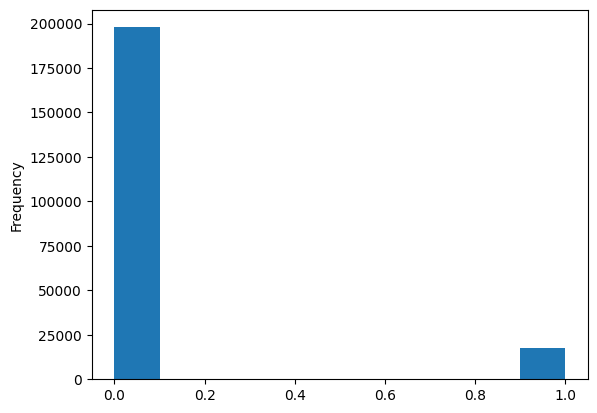

In [10]:
y_train.astype(int).plot.hist()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# Drop the target from the training data

train = X_train.copy()

# Feature names
features = list(train.columns)

# Copy of the testing data
test = X_test.copy()

# Median imputation of missing values
imputer = SimpleImputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(train)

# Transform both training and testing data
train = imputer.transform(train)
test = imputer.transform(test)

# Repeat with the scaler
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (215257, 244)
Testing data shape:  (92254, 244)


In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (395798, 244)
After OverSampling, the shape of train_y: (395798,) 

After OverSampling, counts of label '1': 197899
After OverSampling, counts of label '0': 197899


In [ ]:
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, classification_report
model = LGBMClassifier()
model.fit(X_train_res, y_train_res)

LGBMClassifier()

In [ ]:
pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107730 sha256=0223c2bcba51801bd0b4ff32da1ae4f6d8902aad6b71746134bbc0f09b23ccff
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [ ]:
import eli5
from eli5.sklearn import *

In [ ]:
train_col = data.drop(columns = ['TARGET'])

In [ ]:
%load_ext google.colab.data_table

In [ ]:
perm = PermutationImportance(model, random_state = 1)
perm.fit(test, y_test)
eli5.show_weights(perm, feature_names = train_col.columns.tolist())

Weight,Feature
0.0009 ± 0.0003,CODE_GENDER_M
0.0009 ± 0.0002,CODE_GENDER_F
0.0007 ± 0.0001,EXT_SOURCE_3
0.0004 ± 0.0001,EXT_SOURCE_2
0.0003 ± 0.0002,ELEVATORS_MODE
0.0002 ± 0.0001,DAYS_BIRTH
0.0002 ± 0.0001,CREDIT_TERM
0.0002 ± 0.0000,FLAG_PHONE
0.0001 ± 0.0001,AMT_REQ_CREDIT_BUREAU_QRT
0.0001 ± 0.0001,EXT_SOURCE_1


In [ ]:
eli5.explain_weights_df(perm, feature_names = train_col.columns.tolist())

,feature,weight,std
0,CODE_GENDER_M,0.000947,0.000128
1,CODE_GENDER_F,0.000861,0.000115
2,EXT_SOURCE_3,0.000705,0.000069
3,EXT_SOURCE_2,0.000384,0.000074
4,ELEVATORS_MODE,0.000319,0.000093
...,...,...,...
239,AMT_CREDIT,-0.000039,0.000067
240,DAYS_EMPLOYED_PERCENT,-0.000039,0.000039
241,SK_ID_CURR,-0.000039,0.000028
242,WALLSMATERIAL_MODE_Panel,-0.000041,0.000032


In [11]:
sub_data = data[['CODE_GENDER_M',
'CODE_GENDER_F',
'EXT_SOURCE_3',
'EXT_SOURCE_2',
'ELEVATORS_MODE',
'DAYS_BIRTH',
'CREDIT_TERM',
'FLAG_PHONE',
'AMT_REQ_CREDIT_BUREAU_QRT',
'EXT_SOURCE_1',
'AMT_GOODS_PRICE',
'AMT_REQ_CREDIT_BUREAU_YEAR',
'AMT_INCOME_TOTAL',
'NAME_INCOME_TYPE_Working',
'AMT_REQ_CREDIT_BUREAU_MON',
'CNT_CHILDREN',
'FLAG_OWN_CAR',
'DAYS_EMPLOYED',
'OBS_30_CNT_SOCIAL_CIRCLE',
'FLOORSMAX_MODE',
'REGION_RATING_CLIENT_W_CITY',
'FLOORSMAX_MEDI',
'AMT_ANNUITY',
'DAYS_ID_PUBLISH',
'OWN_CAR_AGE',

'WEEKDAY_APPR_PROCESS_START_WEDNESDAY',
'NAME_EDUCATION_TYPE_Secondary / secondary special',
'FLAG_EMAIL',
'NAME_CONTRACT_TYPE',
'FLOORSMIN_MODE',
'OCCUPATION_TYPE_Core staff',
'NAME_FAMILY_STATUS_Single / not married',
'NONLIVINGAREA_MEDI',
'DEF_30_CNT_SOCIAL_CIRCLE',
'NAME_TYPE_SUITE_Unaccompanied',
'YEARS_BEGINEXPLUATATION_MODE',
'ENTRANCES_MODE',
'CREDIT_INCOME_PERCENT',
'NAME_INCOME_TYPE_State servant',
'WEEKDAY_APPR_PROCESS_START_TUESDAY',
'FLOORSMIN_MEDI',
'ORGANIZATION_TYPE_Construction',
'WEEKDAY_APPR_PROCESS_START_THURSDAY',
'FONDKAPREMONT_MODE_reg oper spec account',
'OCCUPATION_TYPE_Low-skill Laborers',
'NAME_INCOME_TYPE_Commercial associate',
'CNT_FAM_MEMBERS',
'AMT_REQ_CREDIT_BUREAU_WEEK',
'OCCUPATION_TYPE_Sales staff',
'BASEMENTAREA_MEDI',

'REGION_RATING_CLIENT',
'NAME_EDUCATION_TYPE_Lower secondary',
'NAME_HOUSING_TYPE_Municipal apartment',
'YEARS_BEGINEXPLUATATION_AVG',
'DAYS_LAST_PHONE_CHANGE',
'FLAG_DOCUMENT_16',
'NAME_HOUSING_TYPE_House / apartment',
'ORGANIZATION_TYPE_Industry: type 9',
'LIVINGAREA_AVG',
'NAME_HOUSING_TYPE_Rented apartment',
'FLAG_DOCUMENT_3',
'TARGET'

]]

In [12]:
sub_data.shape

(307511, 62)

In [13]:
from sklearn.model_selection import train_test_split
train1, test1  = train_test_split(sub_data, test_size = 0.30,
                                                    random_state = 1)

In [14]:
X_train1 = train1.drop(columns = ['TARGET'])
y_train1 = train1.iloc[:, -1]

In [15]:
X_test1 = test1.drop(columns = ['TARGET'])
y_test1 = test1.iloc[:, -1]

In [16]:
y_train1.head()

208983    0
71687     0
301340    0
216927    0
109091    0
Name: TARGET, dtype: int64

<Axes: ylabel='Frequency'>

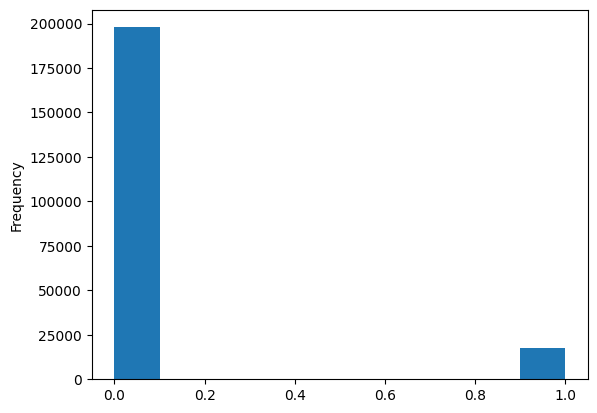

In [17]:
y_train1.astype(int).plot.hist()

In [18]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# Drop the target from the training data

train = X_train1.copy()

# Feature names
features = list(train.columns)

# Copy of the testing data
test = X_test1.copy()

# Median imputation of missing values
imputer = SimpleImputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(train)

# Transform both training and testing data
train = imputer.transform(train)
test = imputer.transform(test)

# Repeat with the scaler
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (215257, 61)
Testing data shape:  (92254, 61)


In [19]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (395798, 61)
After OverSampling, the shape of train_y: (395798,) 

After OverSampling, counts of label '1': 197899
After OverSampling, counts of label '0': 197899


In [20]:
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, classification_report
model = LGBMClassifier()
model.fit(X_train_res, y_train_res)

LGBMClassifier()

In [21]:
y_pred = model.predict(test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84787
           1       0.41      0.03      0.06      7467

    accuracy                           0.92     92254
   macro avg       0.67      0.51      0.51     92254
weighted avg       0.88      0.92      0.88     92254



In [22]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)
precision = precision_score(y_test, y_pred)
print("Precision :", precision)
recall = recall_score(y_test, y_pred)
print("Recall    :", recall)
F1_score = f1_score(y_test, y_pred)
print("F1-score  :", F1_score)

Accuracy   : 0.918030654497366
Precision : 0.4125230202578269
Recall    : 0.029998660774072587
F1-score  : 0.05593008739076155


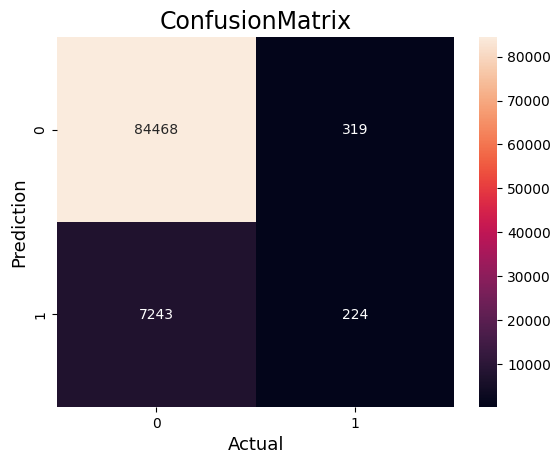

In [23]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(
    cm,
    annot = True,
    fmt = 'g',
    xticklabels = ['0', '1'],
    yticklabels = ['0', '1']
)

plt.ylabel('Prediction', fontsize =13)
plt.xlabel('Actual', fontsize = 13)
plt.title('ConfusionMatrix', fontsize = 17)
plt.show()

In [24]:
y_pred_prob = model.predict_proba(test)[:, 1]

In [25]:

# Compute the false positive rate (FPR)
# and true positive rate (TPR) for different classification thresholds
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label=1)
# Compute the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
roc_auc

0.7408698919606054

In [26]:
# Compute the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
roc_auc

0.7408698919606054

In [27]:
# Compute the false positive rate (FPR)
# and true positive rate (TPR) for different classification thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label=1)

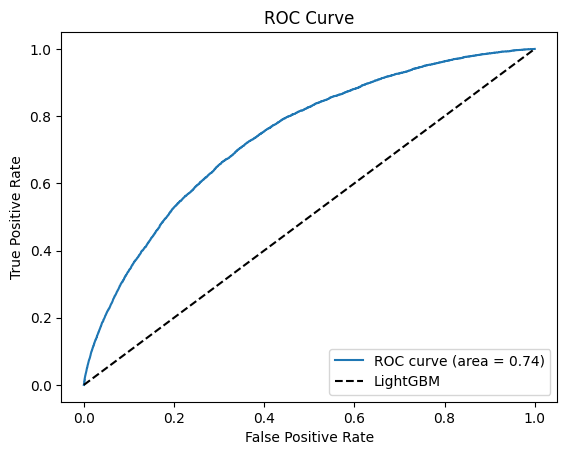

In [28]:
# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
# roc curve for tpr = fpr
plt.plot([0, 1], [0, 1], 'k--', label='LightGBM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()